In [5]:
import pandas as pd
import numpy as np
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
from pmdarima import auto_arima

In [6]:
# Carregar dados (substitua isso pelos seus próprios dados)
def carregar_dados():
    # Exemplo: criando dados sintéticos
    datas = pd.date_range(start='2020-01-01', end='2023-12-31', freq='D')
    vendas = np.random.randint(50, 200, size=len(datas)).astype(np.float64)
    vendas += np.sin(np.arange(len(datas)) * 2 * np.pi / 365) * 50
    df = pd.DataFrame({'data': datas, 'vendas': vendas})
    df.set_index('data', inplace=True)
    return df

def preparar_dados(df):
    # Resample para dados mensais
    df_mensal = df.resample('M').sum()
    return df_mensal

def encontrar_parametros_sarima(dados):
    modelo = auto_arima(dados, seasonal=True, m=12,
                        start_p=0, start_q=0,
                        max_p=3, max_q=3,
                        start_P=0, start_Q=0,
                        max_P=2, max_Q=2,
                        d=1, D=1, trace=True,
                        error_action='ignore',
                        suppress_warnings=True,
                        stepwise=True)
    return modelo.order, modelo.seasonal_order

def treinar_modelo(dados, order, seasonal_order):
    modelo = SARIMAX(dados, order=order, seasonal_order=seasonal_order)
    resultado = modelo.fit()
    return resultado

def fazer_previsoes(modelo, passos):
    previsao = modelo.forecast(steps=passos)
    return previsao


In [7]:
# Visualizar resultados
def visualizar_resultados(dados, previsao):
    plt.figure(figsize=(12, 6))
    plt.plot(dados.index, dados, label='Dados Históricos')
    plt.plot(previsao.index, previsao, label='Previsão', color='red')
    plt.title('Previsão de Demanda')
    plt.xlabel('Data')
    plt.ylabel('Vendas')
    plt.legend()
    plt.show()

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=543.399, Time=0.01 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=534.249, Time=0.08 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=521.953, Time=0.22 sec
 ARIMA(0,1,1)(0,1,0)[12]             : AIC=528.614, Time=0.14 sec
 ARIMA(0,1,1)(1,1,1)[12]             : AIC=inf, Time=0.35 sec
 ARIMA(0,1,1)(0,1,2)[12]             : AIC=inf, Time=0.56 sec
 ARIMA(0,1,1)(1,1,0)[12]             : AIC=523.958, Time=0.10 sec
 ARIMA(0,1,1)(1,1,2)[12]             : AIC=inf, Time=0.79 sec
 ARIMA(0,1,0)(0,1,1)[12]             : AIC=537.380, Time=0.08 sec
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=523.874, Time=0.31 sec
 ARIMA(0,1,2)(0,1,1)[12]             : AIC=523.853, Time=0.33 sec
 ARIMA(1,1,0)(0,1,1)[12]             : AIC=532.073, Time=0.12 sec
 ARIMA(1,1,2)(0,1,1)[12]             : AIC=inf, Time=0.38 sec
 ARIMA(0,1,1)(0,1,1)[12] intercept   : AIC=inf, Time=0.32 sec

Best model:  ARIMA(0,1,1)(0,1,1)[12]          
Total

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


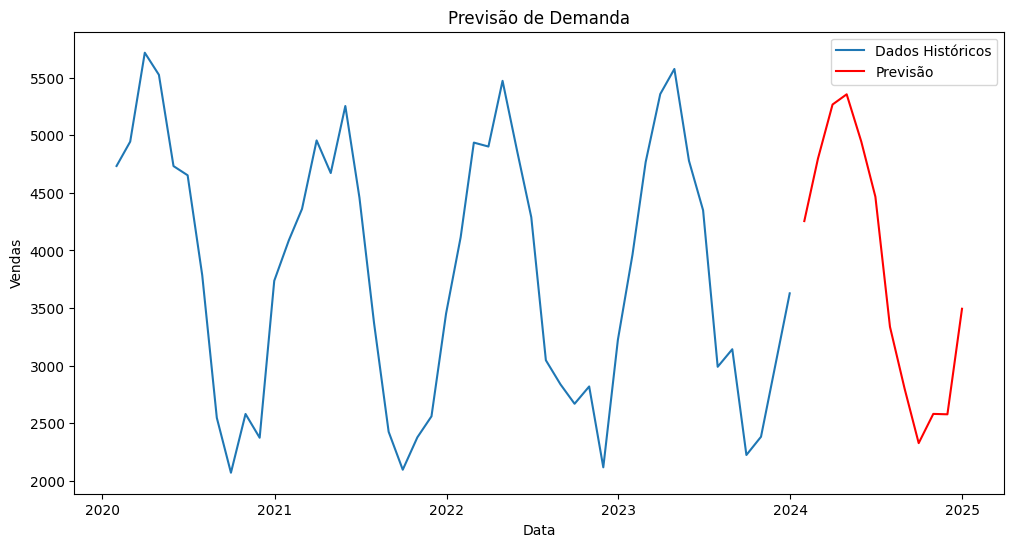

In [8]:
# Função principal
def main():
    # Carregar e preparar dados
    df = carregar_dados()
    dados_mensais = preparar_dados(df)

    # Encontrar melhores parâmetros
    order, seasonal_order = encontrar_parametros_sarima(dados_mensais)
    print(f"Melhores parâmetros: SARIMA{order}{seasonal_order}")

    # Treinar modelo
    modelo = treinar_modelo(dados_mensais, order, seasonal_order)

    # Fazer previsões para os próximos 12 meses
    previsao = fazer_previsoes(modelo, 12)

    # Visualizar resultados
    visualizar_resultados(dados_mensais, previsao)

if __name__ == "__main__":
    main()